In [49]:
import pandas as pd
df=pd.read_excel("glass.xlsx",sheet_name="glass")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


**1. Exploratory Data Analysis (EDA):**

In this we are checking the data like null values

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Checking duplicate values



In [51]:
df.duplicated().sum()

np.int64(1)

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


**2: Data Visualization:**

To find out laiers

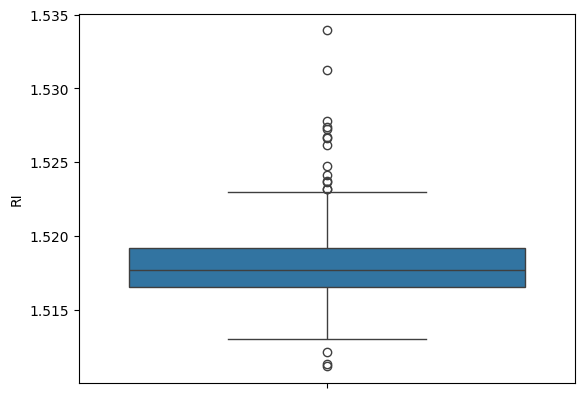

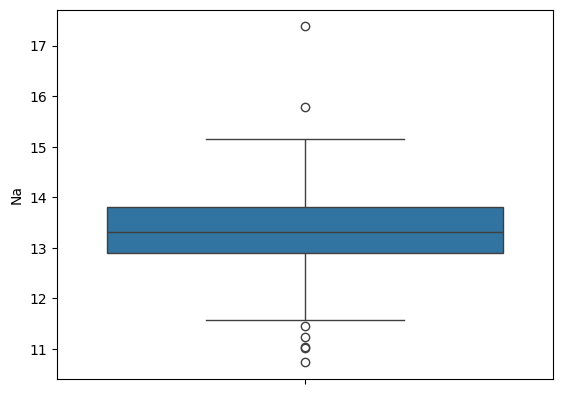

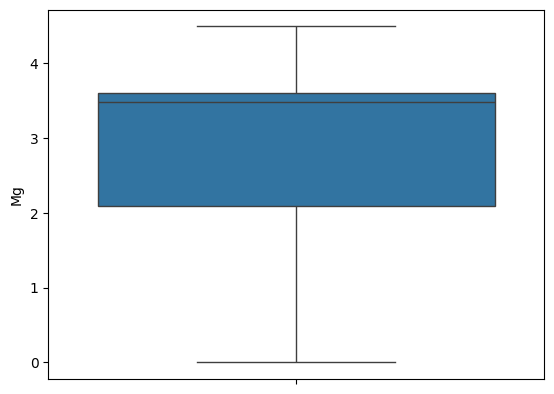

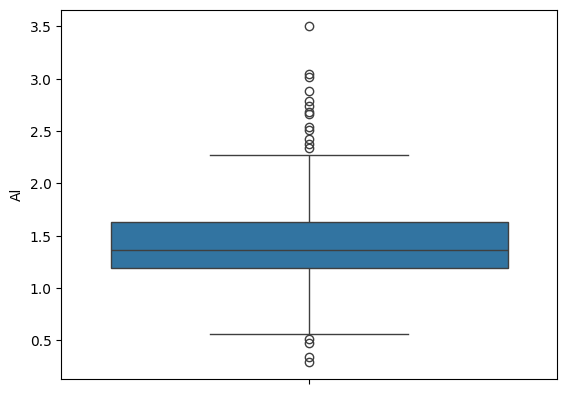

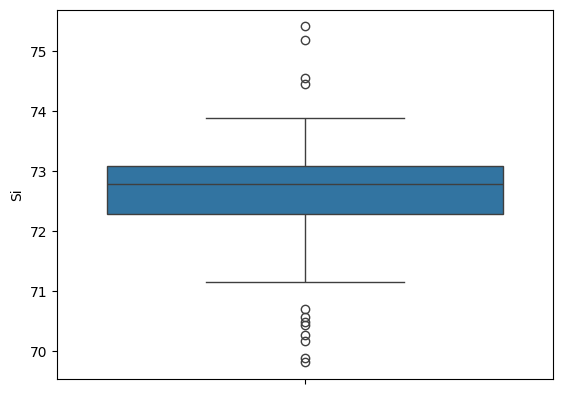

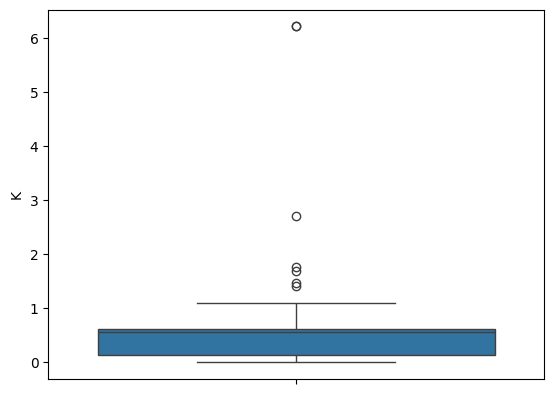

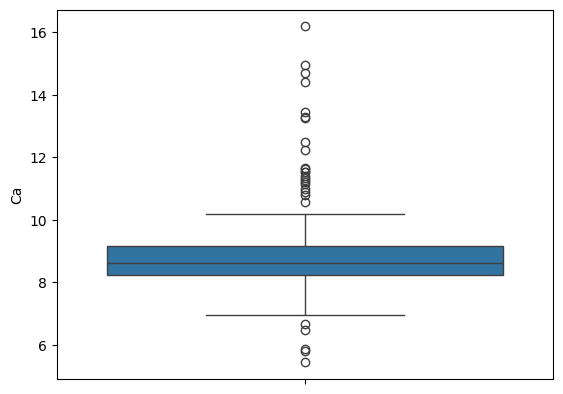

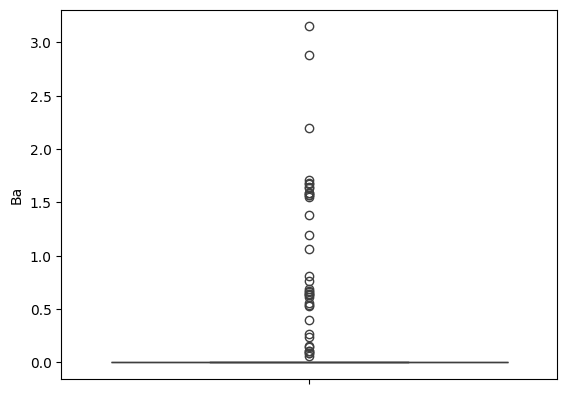

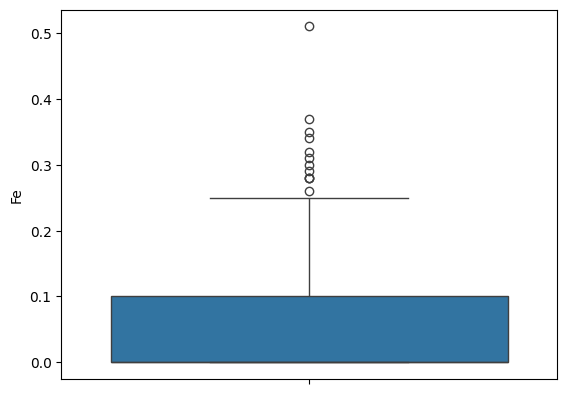

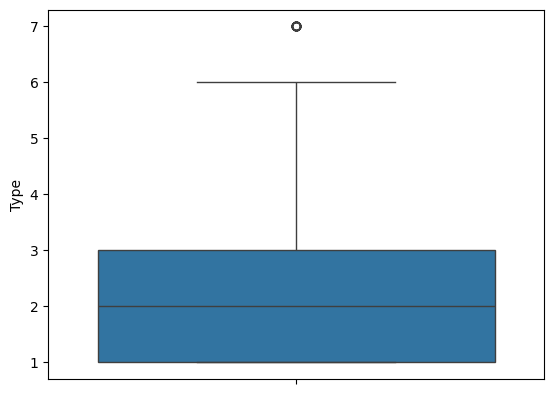

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

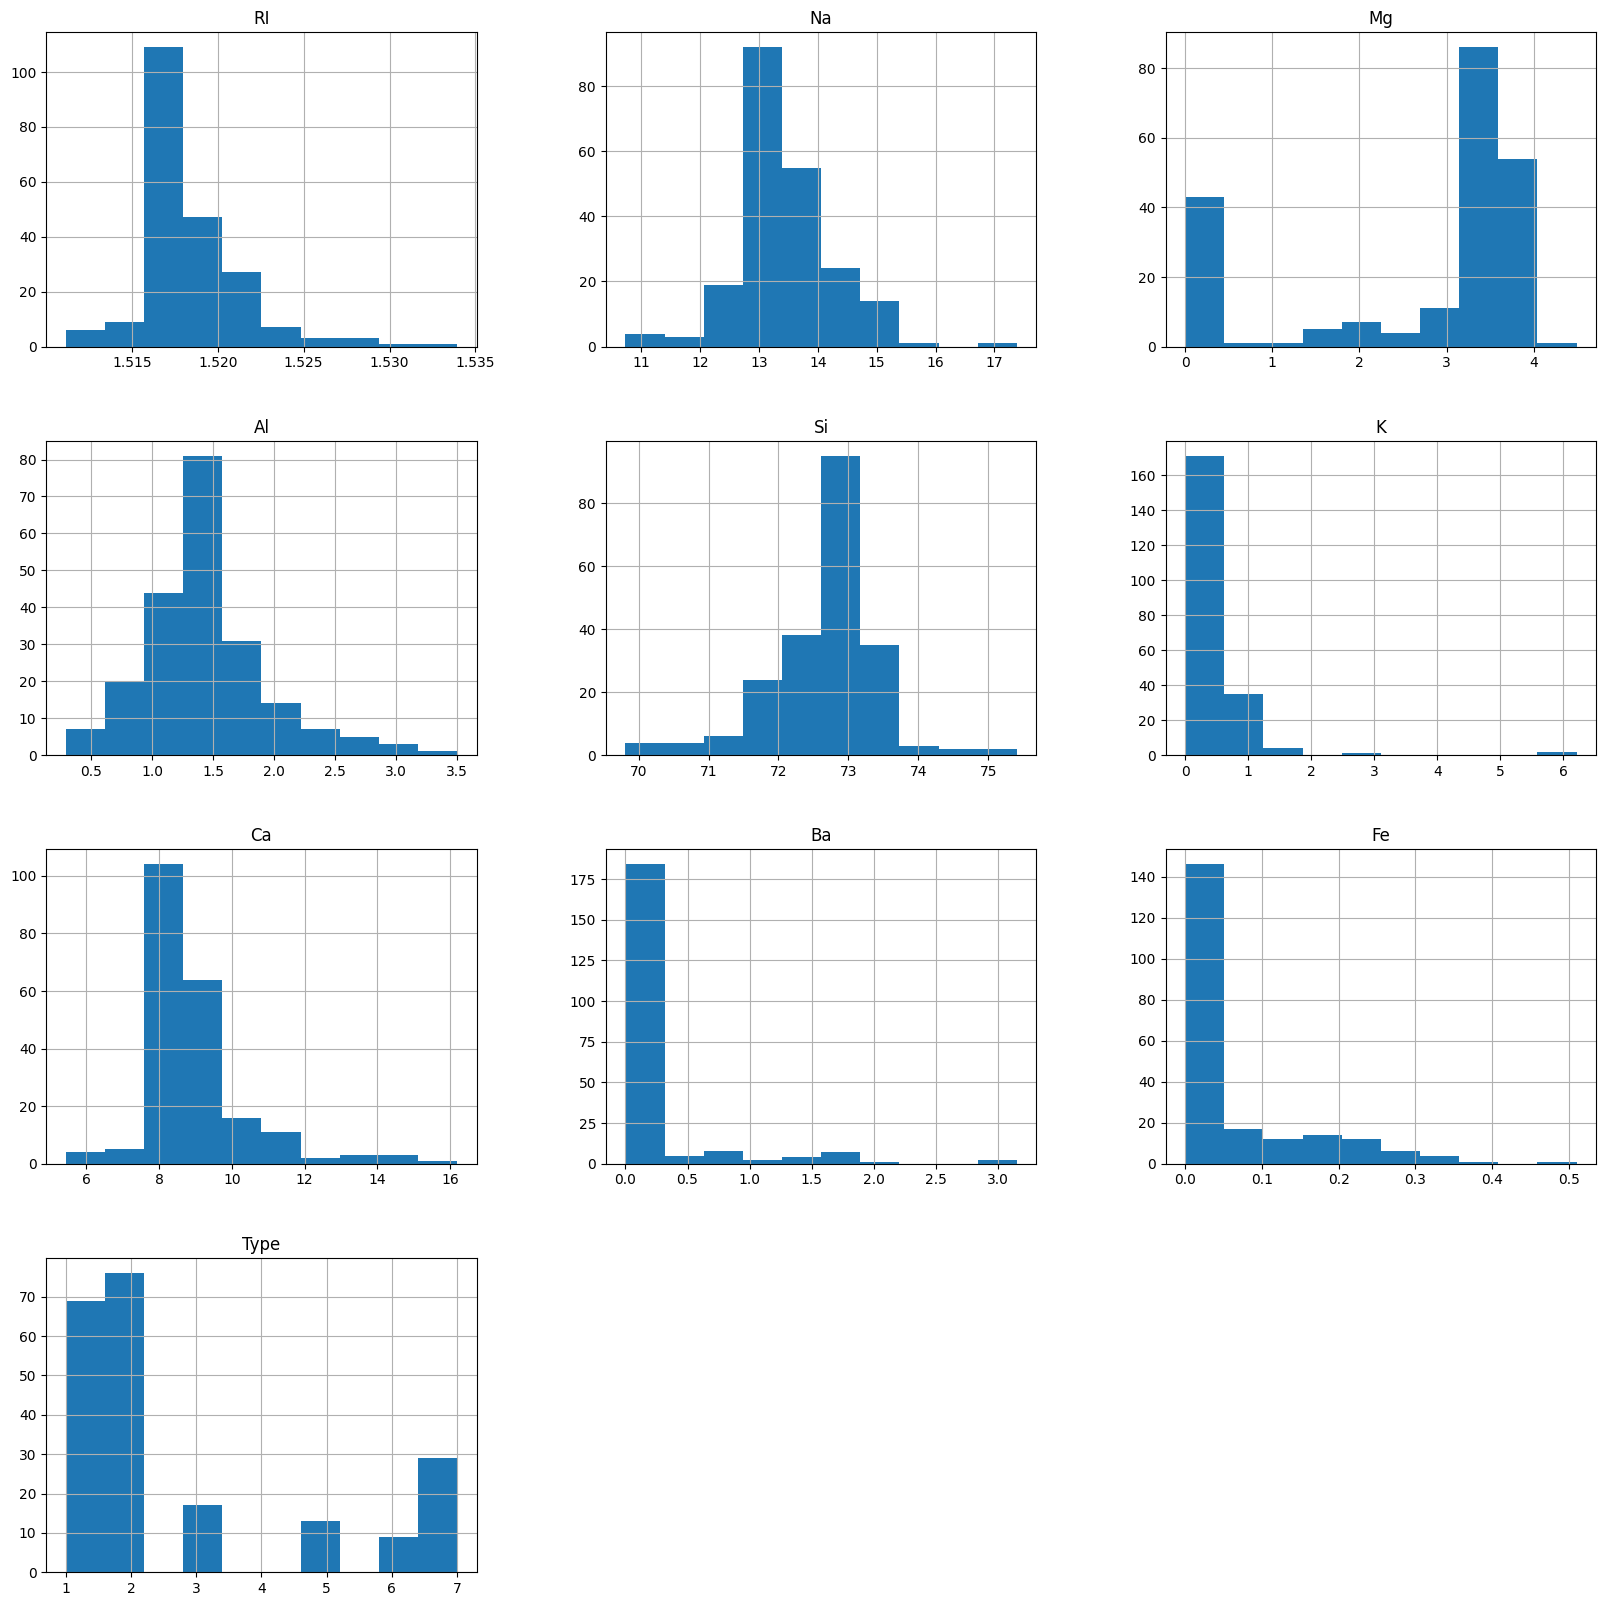

In [55]:
df.hist(figsize=(20,20))
plt.show()

Corelation


<Axes: >

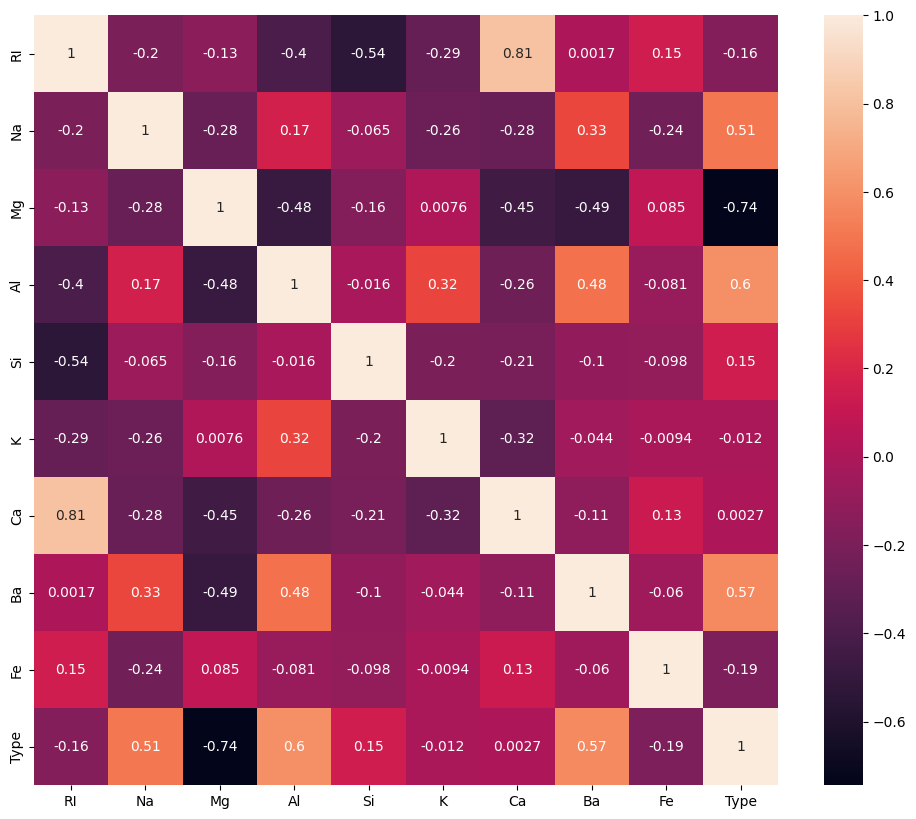

In [56]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

**3: Data Preprocessing**

Apply feature scaling technique normalization to ensure that all features are on a similar scale and Handling the imbalance data.

In [57]:
x=df.drop("Type",axis=1)
Y=df["Type"]

In [58]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
SS = StandardScaler()
X= SS.fit_transform(x)
X= pd.DataFrame(X)
X.columns = list(x)
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report


rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_samples = 0.6, max_features=0.7)
rf_model.fit(X_train, Y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)


print("Training Accuracy:", accuracy_score(Y_train, y_pred_train_rf))
print("Testing Accuracy:", accuracy_score(Y_test, y_pred_test_rf))
print(classification_report(Y_test,y_pred_test_rf))

Training Accuracy: 0.9882352941176471
Testing Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

           1       0.77      1.00      0.87        10
           2       0.80      0.80      0.80        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.84        43
   macro avg       0.89      0.82      0.83        43
weighted avg       0.86      0.84      0.84        43



Here from the above result of accuracy score we have got slightly overfitting where compare to train and test score from the above

**Precision:** Out of all predicted as class X, how many are correct.

**Recall:** Out of all actual class X, how many did the model catch.

**F1-score:** Balance between precision & recall.

**Support:** Number of test samples for that class.

**5: Bagging and Boosting Methods**

Apply the Bagging and Boosting methods and compare the results.

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'),
                                  n_estimators=100, random_state=42,
                                  max_samples=0.6,max_features=0.7)
bagging_model.fit(X_train, Y_train)

y_pred_train_bagging = bagging_model.predict(X_train)
y_pred_test_bagging = bagging_model.predict(X_test)

training_accuracy_bagging = accuracy_score(Y_train, y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(Y_test, y_pred_test_bagging)

print("Bagging - Training Accuracy:", training_accuracy_bagging)
print("Bagging - Test Accuracy:", test_accuracy_bagging)

Bagging - Training Accuracy: 0.9941176470588236
Bagging - Test Accuracy: 0.813953488372093


From comparing both Random forest with accuracy score and Bagging with accuracy score we have got

**Random Forest **
Training Accuracy: 0.9882352941176471

Testing Accuracy: 0.8372093023255814

**Bagging Classifier**

Bagging - Training Accuracy: 0.9941176470588236

Bagging - Test Accuracy: 0.813953488372093

Where Random Forest has got more test accuracy score and it has low variance when compare to bagging classifier variance

**Additional Note**

1. Explain Bagging and Boosting methods. How is it different from each other.

**Bagging:**

Train multiple models in parallel on different random subsets of the data (with replacement) and combine their predictions (usually majority vote for classification or averaging for regression).

**Boosting**

Train models sequentially, where each new model tries to fix the errors of the previous one.

2. Explain how to handle imbalance in the data.

Duplicate minority class samples or create synthetic ones.

Randomly remove samples from the majority class.

Useful when dataset is very large.

Many models (Logistic Regression, RandomForest, XGBoost) allow setting class_weight to penalize wrong predictions on minority class.

In images, you can flip/rotate/crop.

In text, you can use paraphrasing or synonym replacement.